In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="white")

In [2]:
## connect to database

con = psycopg2.connect("dbname='doctordb' user='cathy'")

# Focus on 'Medical Oncology' providers

## Summary table

In [3]:
q = "SELECT * FROM summary WHERE provider_type = 'Medical Oncology'"
summary_df = pd.read_sql_query(q, con=con)

In [79]:
summary_df.shape

(2849, 70)

In [4]:
summary_df.head(5)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score
0,1003019571,SEHGAL,RAJESH,None,MD,M,I,400 OXFORD DR,SUITE 102,MONROEVILLE,...,29.0,32.0,52.0,72.0,48.0,13.0,43.0,10.0,11.0,2.2866
1,1003087768,BATUS,MARTA,None,MD,F,I,1725 W HARRISON ST,SUITE 809,CHICAGO,...,23.0,37.0,54.0,71.0,46.0,6.0,38.0,6.0,10.0,2.2670
2,1003166042,FINE,HOWARD,A,M.D.,M,I,160 E 34TH ST,None,NEW YORK,...,NaN,NaN,41.0,55.0,NaN,NaN,NaN,NaN,NaN,1.8537
3,1003805409,WILLIAMS,STEPHANIE,F,MD,F,I,145 MICHIGAN ST NE,SUITE 5200,GRAND RAPIDS,...,37.0,NaN,53.0,60.0,40.0,NaN,53.0,NaN,NaN,3.7059
4,1003807645,LUNIN,SCOTT,D,M.D.,M,I,3085 BOBCAT VILLAGE CENTER RD,None,NORTH PORT,...,19.0,27.0,59.0,69.0,43.0,12.0,40.0,2.0,5.0,1.9320


In [5]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 70 columns):
npi                                 2849 non-null object
nppes_provider_last_org_name        2849 non-null object
nppes_provider_first_name           2849 non-null object
nppes_provider_mi                   2015 non-null object
nppes_credentials                   2782 non-null object
nppes_provider_gender               2849 non-null object
nppes_entity_code                   2849 non-null object
nppes_provider_street1              2849 non-null object
nppes_provider_street2              1362 non-null object
nppes_provider_city                 2849 non-null object
nppes_provider_zip                  2849 non-null object
nppes_provider_state                2849 non-null object
nppes_provider_country              2849 non-null object
provider_type                       2849 non-null object
medicare_participation_indicator    2849 non-null object
number_of_hcpcs                     28

In [6]:
summary_df.describe()

/home/cathy/miniconda3/envs/medicare_provider_util_payment/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,total_medicare_stnd_amt,number_of_drug_hcpcs,total_drug_services,total_drug_unique_benes,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score
count,2849.000000,2849.000000,2849.000000,2.849000e+03,2.849000e+03,2.849000e+03,2.849000e+03,2654.000000,2654.000000,2654.000000,...,2626.000000,2661.000000,2763.000000,2808.000000,2686.000000,2085.000000,2682.000000,1330.000000,1622.000000,2849.000000
mean,52.073710,37098.779045,315.636715,1.529446e+06,5.957589e+05,4.614299e+05,4.604957e+05,23.013564,36320.276300,66.218161,...,24.049886,32.311913,52.485342,67.182336,37.930380,10.665707,36.123043,4.533835,6.304562,2.020862
std,55.252607,75408.656674,412.265971,2.681943e+06,1.010083e+06,7.857432e+05,7.853588e+05,30.090074,72694.425391,115.847832,...,6.699892,8.168229,9.328081,7.932622,10.529837,4.298819,7.333872,3.048514,3.487489,0.455704
min,1.000000,11.000000,11.000000,1.170000e+03,3.226100e+02,2.249500e+02,2.112000e+02,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.717800
25%,11.000000,386.000000,116.000000,9.168700e+04,3.695078e+04,2.732282e+04,2.683486e+04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.743900
50%,18.000000,1102.000000,232.000000,2.285350e+05,8.754165e+04,6.564640e+04,6.507745e+04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.963200
75%,96.000000,43001.000000,417.000000,1.832850e+06,7.691365e+05,5.992692e+05,5.889507e+05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.244400
max,586.000000,980590.000000,16424.000000,2.523209e+07,9.449795e+06,7.419885e+06,7.426478e+06,119.000000,954685.000000,851.000000,...,71.000000,75.000000,75.000000,75.000000,75.000000,51.000000,74.000000,25.000000,39.000000,4.815700


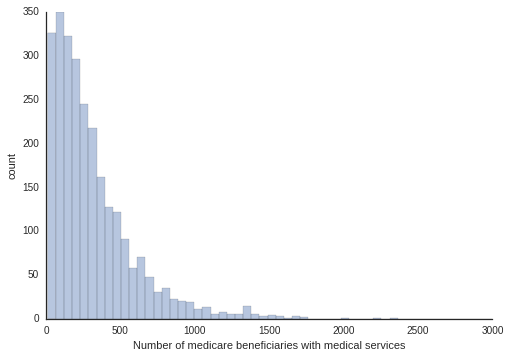

In [9]:
## number of medicare beneficiaries with medical services
g = sns.distplot(summary_df['total_med_unique_benes'].dropna(how='any'), kde=False, bins=300)
g.set(xlim=(0, 3000))
g.set(xlabel="Number of medicare beneficiaries with medical services", ylabel="count")
sns.despine()

Distribution of "number of medicare beneficiaries with medical services" at high end  

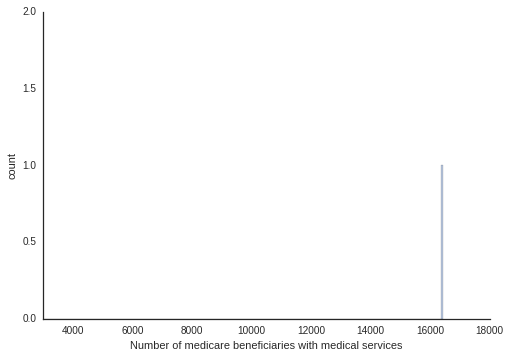

In [13]:
g = sns.distplot(summary_df['total_med_unique_benes'].dropna(how='any'), kde=False, bins=300)
g.set(xlim=(3000, 18000), ylim=(0,2))
g.set(xlabel="Number of medicare beneficiaries with medical services", ylabel="count")
sns.despine()

Which provider has > 16,000 medicare beneficiaries?

In [14]:
summary_df[summary_df.total_med_unique_benes > 3000]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score
1377,1487669933,TAI,EDMUND,None,M.D.,M,I,701 E EL CAMINO REAL,None,MOUNTAIN VIEW,...,15.0,25.0,48.0,53.0,19.0,7.0,22.0,2.0,3.0,0.944


Entity type codes:
1 - individual
2 - organization

How many individuals/organizations are there in the medical oncology dataset?
A: each medical oncology entry is an individual

In [18]:
summary_df[['nppes_entity_code']].groupby(['nppes_entity_code']).count()

""
nppes_entity_code
I


Distribution of total submitted charge amounts

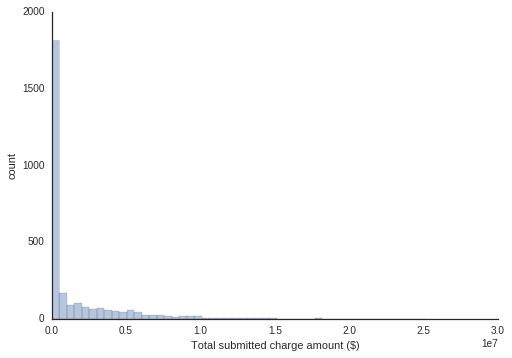

In [23]:
g = sns.distplot(summary_df['total_submitted_chrg_amt'], kde=False)
g.set(xlabel="Total submitted charge amount ($)", ylabel="count")
sns.despine()

How many MOs didn't submit any charges?

In [21]:
summary_df[summary_df['total_submitted_chrg_amt'] == 0].shape

(0, 70)

Distribution of submitted charges at lower end

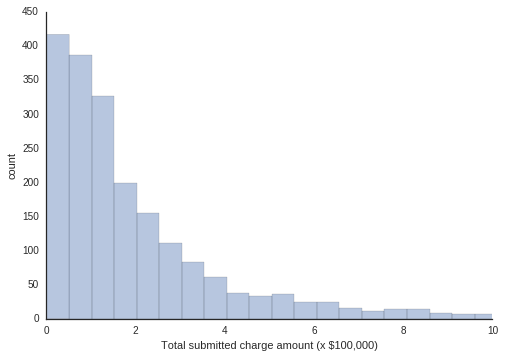

In [56]:
g = sns.distplot(summary_df['total_submitted_chrg_amt']/1e5, kde=False, bins=500)
g.set(xlim=(0,10))
g.set(xlabel="Total submitted charge amount (x $100,000)", ylabel="count")
sns.despine()

Distribution of submitted charges at higher end

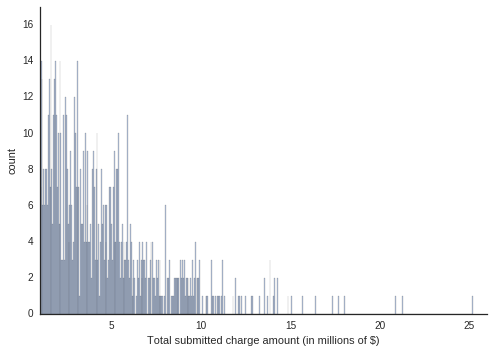

In [60]:
g = sns.distplot(summary_df['total_submitted_chrg_amt']/1e6, kde=False, bins=500)
g.set(xlim=(1,26), ylim=(0,17))
g.set(xlabel="Total submitted charge amount (in millions of $)", ylabel="count")
sns.despine()

Check: does `total_submitted_chrg_amt` == `total_med_submitted_chrg_amt` + `total_drug_submitted_chrg_amt` ?

In [75]:
charge_diff = (summary_df[['total_submitted_chrg_amt', 'total_med_submitted_chrg_amt', 'total_drug_submitted_chrg_amt']]
     .dropna()
     .assign(diff = lambda x: x.total_submitted_chrg_amt - 
                             (x.total_med_submitted_chrg_amt + x.total_drug_submitted_chrg_amt)))

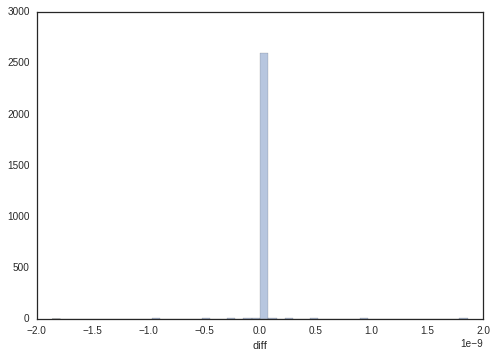

In [76]:
sns.distplot(charge_diff['diff'], kde=False)

How many rows have diff == 0? and nonzero?

In [77]:
charge_diff.query('diff == 0').shape

(2593, 4)

In [78]:
charge_diff.query('diff != 0').shape

(61, 4)

What is the source of discrepancy of totaled charges in these 61 rows?

Total number of doctors is 2849 (!= 2593 + 61), so the missing numbers must be due to dropped NAs

## Relationship between charges/payments and number of beneficiaries

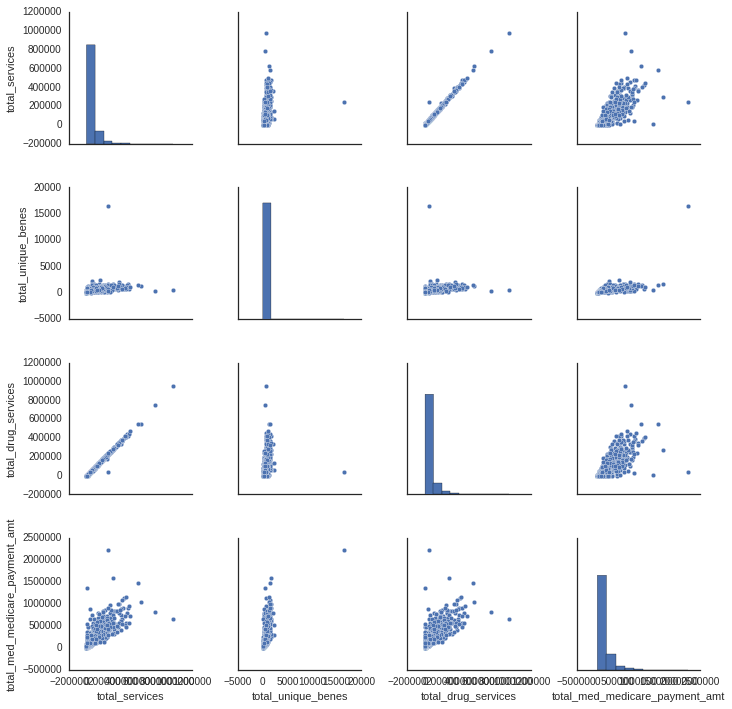

In [88]:
plt.figure(figsize=(20, 15))
g = sns.pairplot(summary_df[['total_services',
                            'total_unique_benes',
                            'total_drug_services',
                            'total_med_medicare_payment_amt']].dropna())

Average Medicare payment per patient for non-drug (non-ASP) services

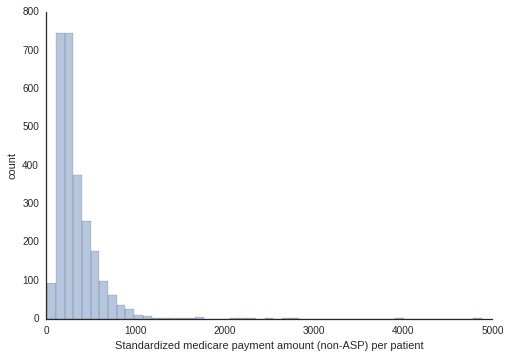

In [112]:
g = (summary_df
     .query('total_med_unique_benes > 0')
     .assign(med_pay_per_patient = lambda x: x.total_med_medicare_stnd_amt / x.total_med_unique_benes)
     .loc[:,['med_pay_per_patient']]
     .pipe((sns.distplot, 'a'), kde=False))
g.set(xlabel="Standardized medicare payment amount (non-ASP) per patient", ylabel="count")
sns.despine()

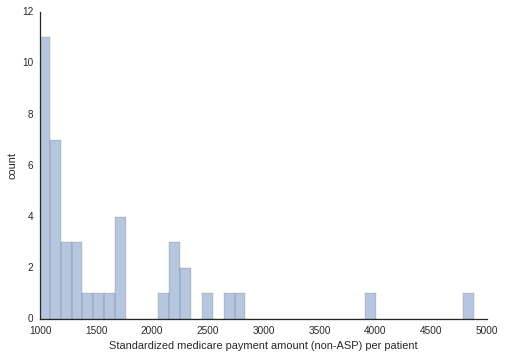

In [110]:
## Look at higher values of $/patient
g = (summary_df
     .query('total_med_unique_benes > 0')
     .assign(med_pay_per_patient = lambda x: x.total_med_medicare_stnd_amt / x.total_med_unique_benes)
     .loc[:,['med_pay_per_patient']]
     .pipe((sns.distplot, 'a'), kde=False))
g.set(xlim=(1000, 5000), 
      ylim=(0,12), 
      xlabel="Standardized medicare payment amount (non-ASP) per patient", 
      ylabel="count")
sns.despine()

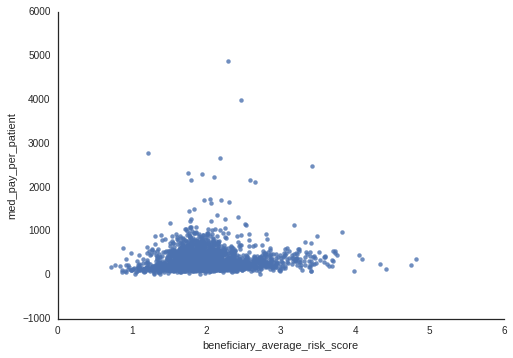

In [125]:
g = (summary_df
     .query('total_med_unique_benes > 0')
     .assign(med_pay_per_patient = lambda x: x.total_med_medicare_stnd_amt / x.total_med_unique_benes)
     .pipe((sns.regplot,'data'), 
           x='beneficiary_average_risk_score', y='med_pay_per_patient', fit_reg=False))
sns.despine()

The average medicare medical payment per patient does not appear strongly correlated with the beneficiary average risk score (at least as assigned by Medicare).

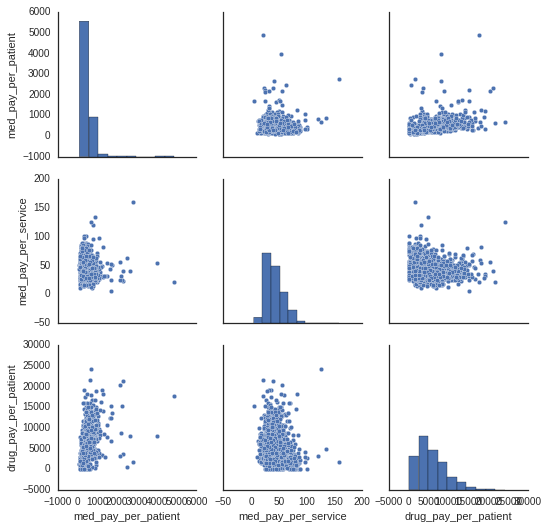

In [116]:
(summary_df.query('total_med_unique_benes > 0 & total_med_services > 0 & total_drug_unique_benes > 0')
            .assign(med_pay_per_patient = lambda x: x.total_med_medicare_stnd_amt / x.total_med_unique_benes,
                   med_pay_per_service = lambda x: x.total_med_medicare_stnd_amt / x.total_med_services,
                   drug_pay_per_patient = lambda x: x.total_drug_medicare_stnd_amt / x.total_drug_unique_benes)
            .loc[:,['med_pay_per_patient', 'med_pay_per_service', 'drug_pay_per_patient']]
            .pipe((sns.pairplot, 'data')))

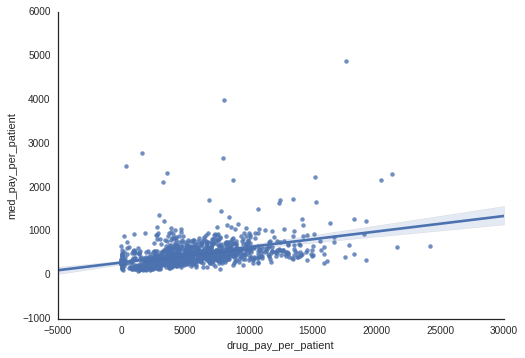

In [127]:
g = (summary_df
     .query('total_med_unique_benes > 0')
     .assign(med_pay_per_patient = lambda x: x.total_med_medicare_stnd_amt / x.total_med_unique_benes,
            drug_pay_per_patient = lambda x: x.total_drug_medicare_stnd_amt / x.total_drug_unique_benes)
     .pipe((sns.regplot,'data'), 
           x='drug_pay_per_patient', y='med_pay_per_patient', fit_reg=True))
sns.despine()

Whoa! cost of drugs per patient greatly exceeds medicare medical (non drug) pay per patient

In [128]:
# close connection to database
if con: 
    con.close()